# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

%matplotlib inline

In [2]:
exch_rates = pd.read_csv('exch_rates.csv')
exch_rates.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [3]:
exch_rates.Frequency = pd.to_datetime(exch_rates.Frequency)
exch_rates.set_index('Frequency', inplace=True)
exch_rates.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20',
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26'],
              dtype='datetime64[ns]', name='Frequency', length=6905, freq=None)

Plot the three exchange rates in one plot

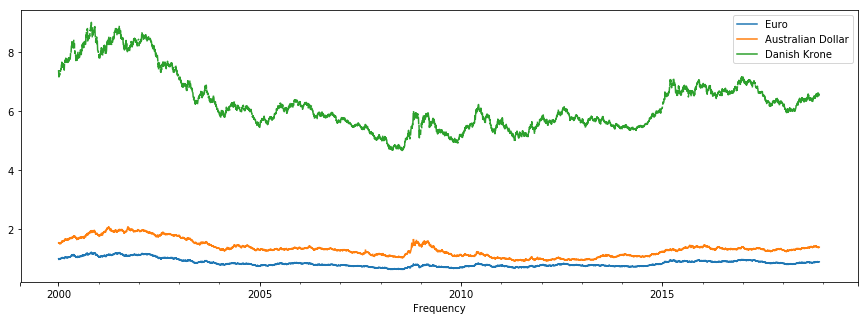

In [4]:
exch_rates.plot(figsize=(15,5))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [5]:
exch_rates.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

They are highly correlated, the Euro and Krone are almost perfect.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [7]:
exch_rates_diff = exch_rates.diff(periods=1)

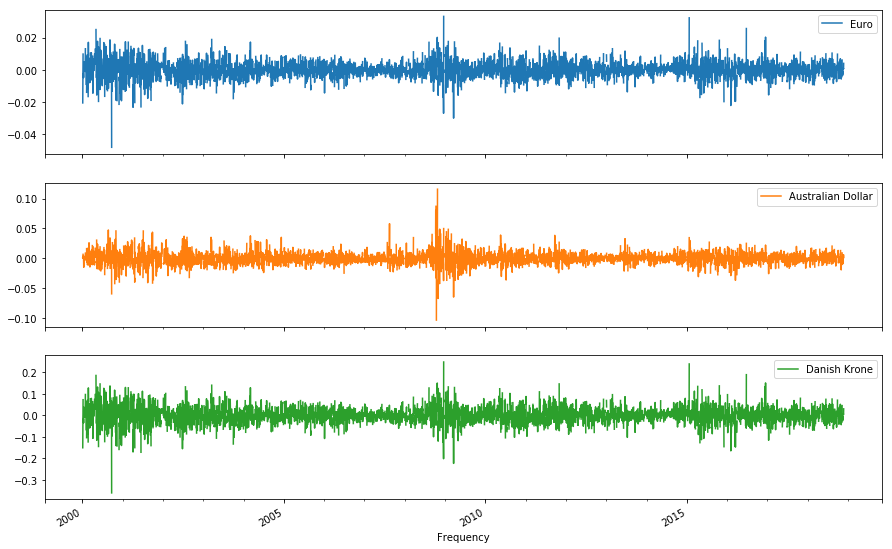

In [10]:
exch_rates_diff.plot(figsize=(15,10), subplots=True, legend=True);

In [11]:
exch_rates_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

By removing seasonality, the correlation has decreased

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [6]:
euro = exch_rates[['Euro']]

In [7]:
euro_shift_1 = euro.shift(periods=1)
euro_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


In [8]:
lag_1 = pd.concat([euro_shift_1, euro], axis=1)
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


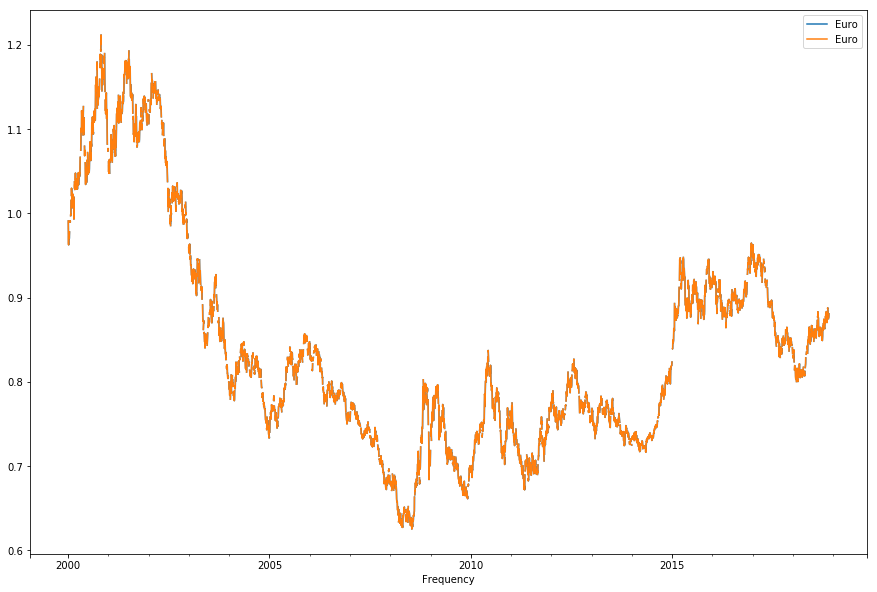

In [16]:
lag_1.plot(figsize=(15,10));

Repeat this, but for a "lag 5 autocorrelation"

In [9]:
euro_shift_5 = euro.shift(periods=50)
euro_shift_5.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN


In [10]:
lag_5 = pd.concat([euro_shift_5, euro], axis=1)
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


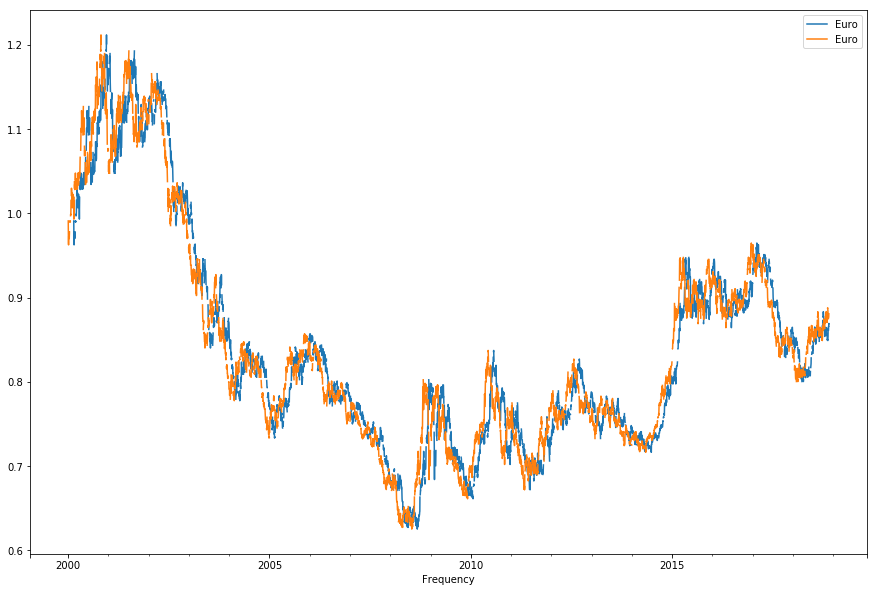

In [19]:
lag_5.plot(figsize=(15,10));

### What's your conclusion here?

High correlation even for a delay (lag) of 50

Knowing this, let's plot the ACF now.

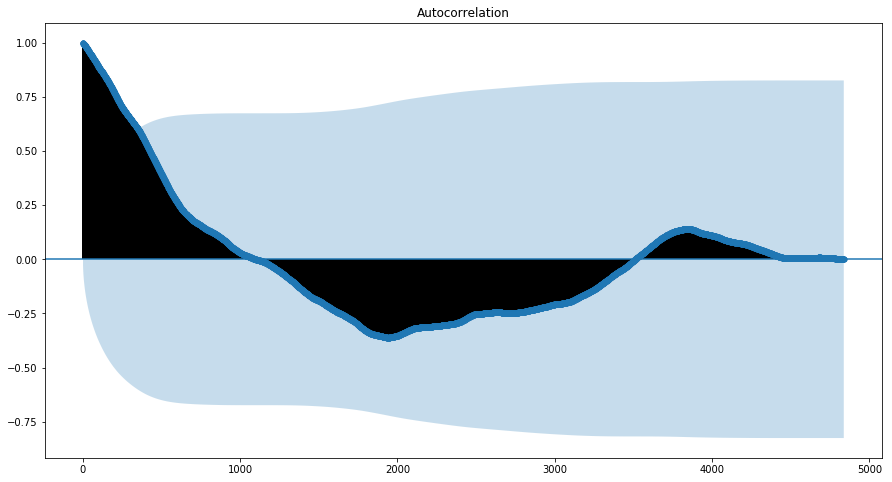

In [11]:
rcParams['figure.figsize'] = 15,8
plot_acf(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

In [ ]:
rcParams['figure.figsize'] = 15,8
plot_pacf(euro.dropna(), lags = 100)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [13]:
passengers = pd.read_csv('passengers.csv')
passengers.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
passengers.Month = pd.to_datetime(passengers.Month)
passengers.set_index('Month', inplace=True)
passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

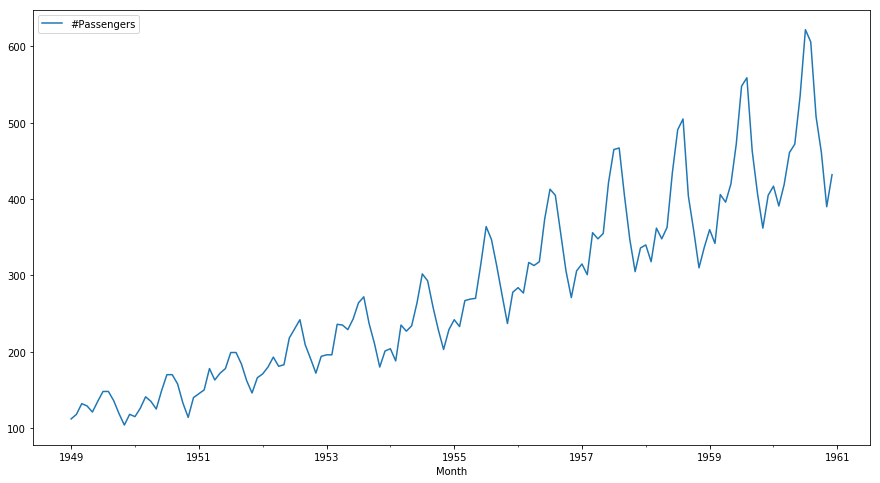

In [17]:
passengers.plot()

In [18]:
#Differenced series

passengers_diff = passengers.diff(periods=12)
passengers_diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


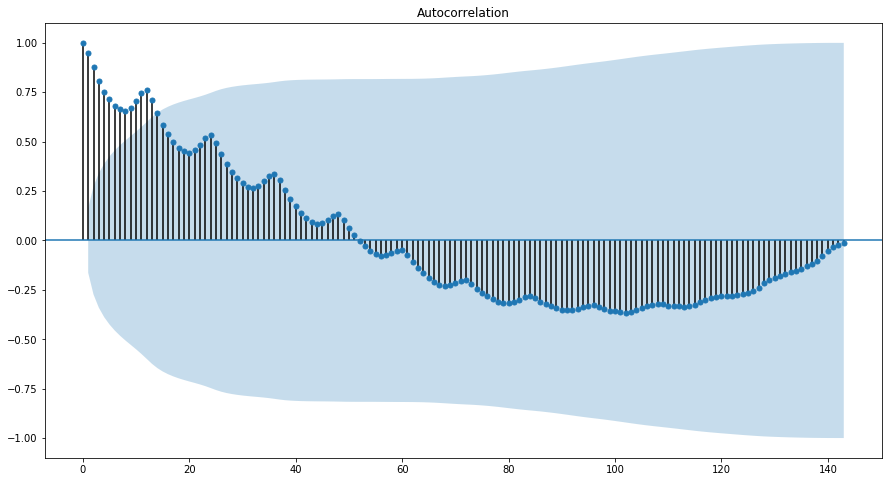

In [19]:
# AFC for regular series
rcParams['figure.figsize'] = 15,8
plot_acf(passengers.dropna());

/Users/natalia/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


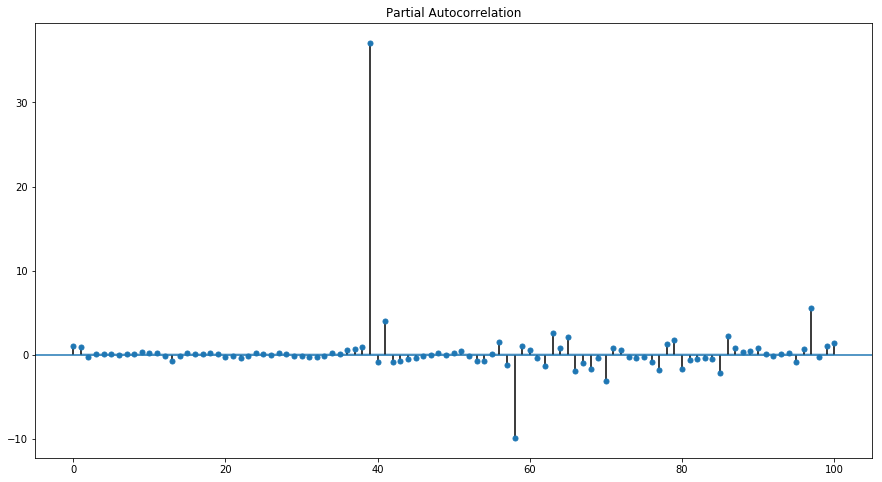

In [27]:
# PACF for regular series
rcParams['figure.figsize'] = 15,8
plot_pacf(passengers.dropna(), lags=100);

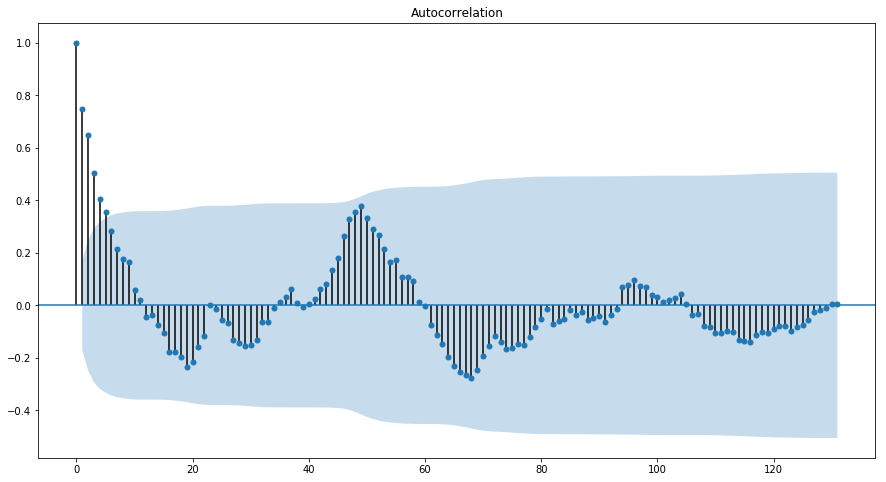

In [21]:
# AFC for differenced series
rcParams['figure.figsize'] = 15,8
plot_acf(passengers_diff.dropna());

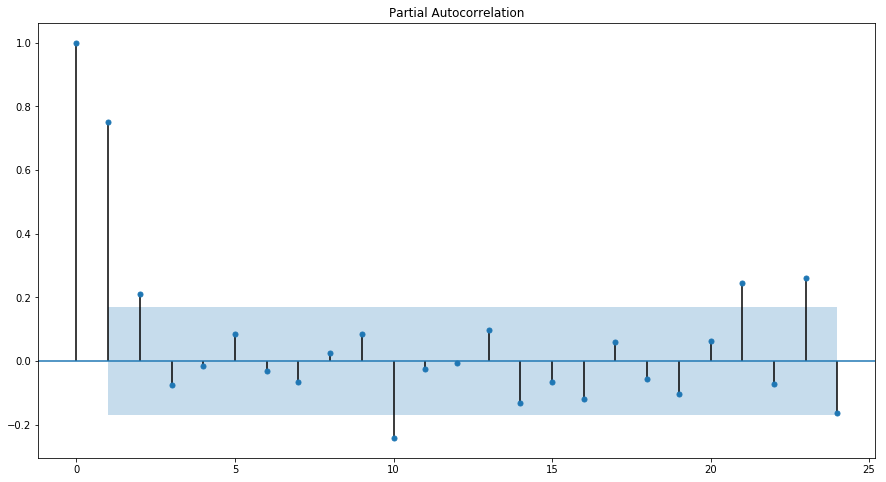

In [38]:
# PACF for differenced series
rcParams['figure.figsize'] = 15,8
plot_pacf(passengers_diff.dropna(), lags=24);

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [29]:
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [31]:
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


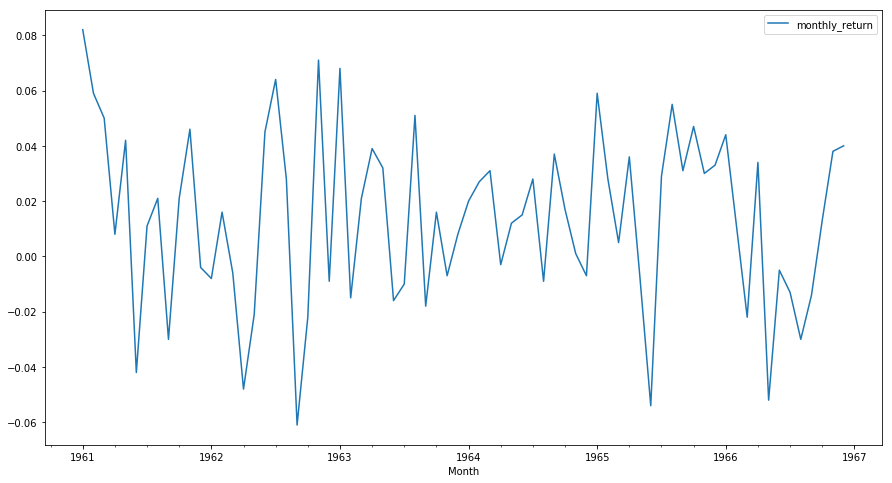

In [32]:
nyse.plot();

In [33]:
#Differenced series

nyse_diff = nyse.diff(periods=12)
nyse_diff.head()

,monthly_return
Month,
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN


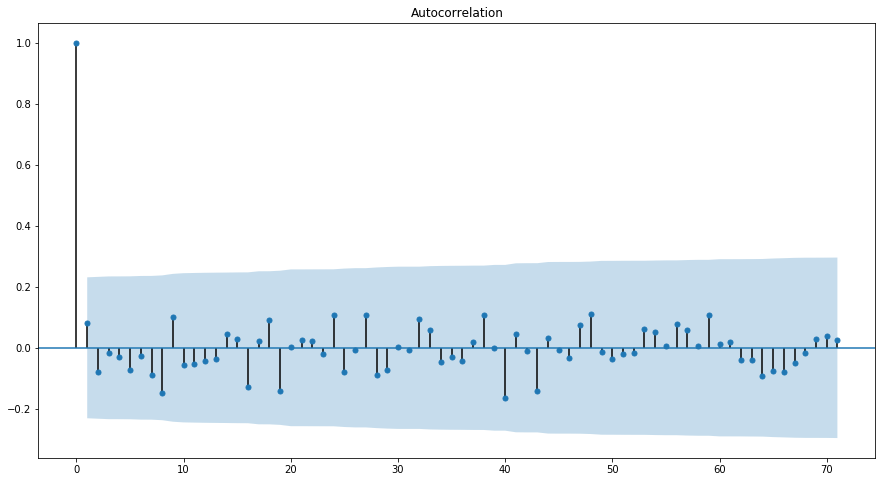

In [34]:
# AFC for regular series
rcParams['figure.figsize'] = 15,8
plot_acf(nyse.dropna());

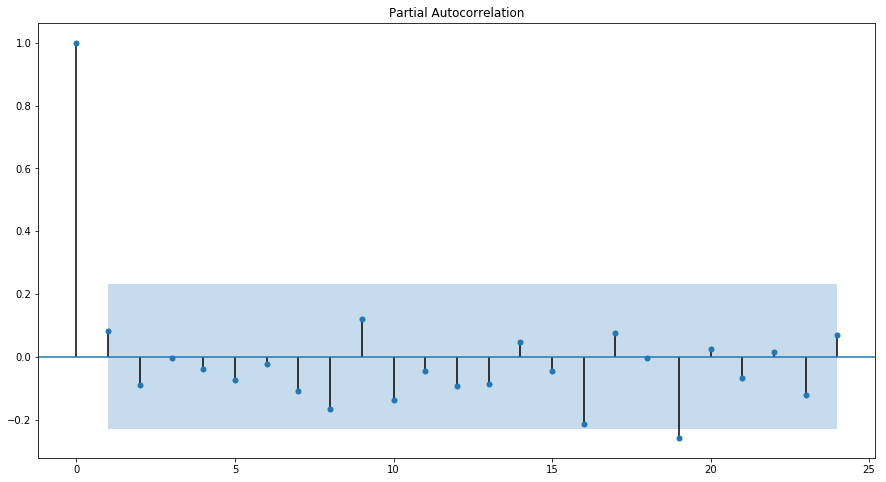

In [41]:
# PACF for regular series
rcParams['figure.figsize'] = 15,8
plot_pacf(nyse.dropna(), lags=24);

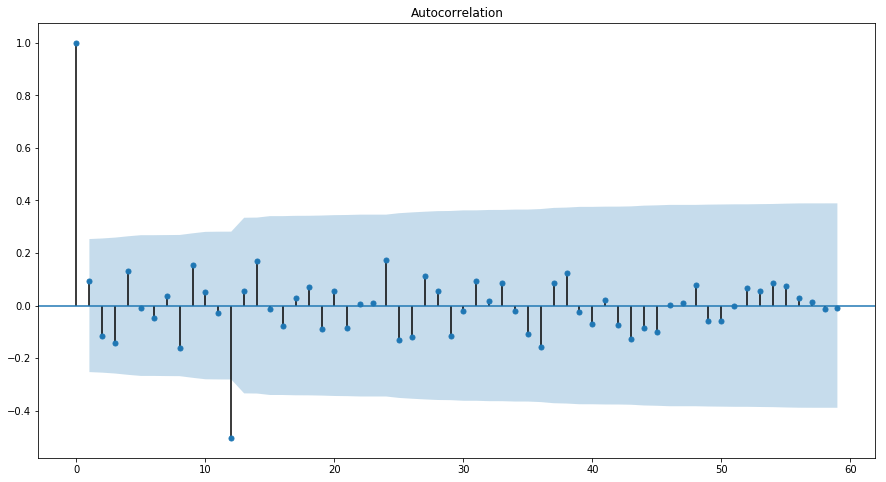

In [39]:
# AFC for differenced series
rcParams['figure.figsize'] = 15,8
plot_acf(nyse_diff.dropna());

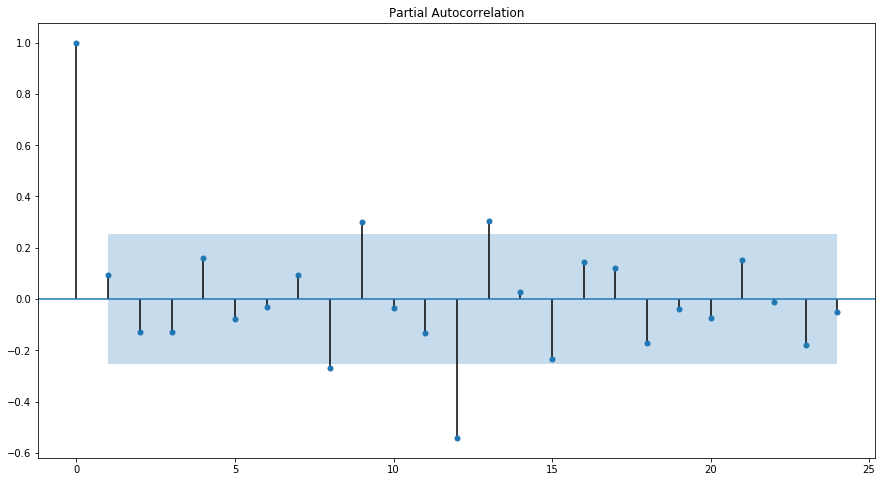

In [42]:
# PACF for differenced series
rcParams['figure.figsize'] = 15,8
plot_pacf(nyse_diff.dropna(), lags=24);

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!